**Imports**

In [1]:
import os
import re
from pathlib import Path
from typing import Dict, List, Tuple
import pandas as pd
from PIL import Image
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, models

In [2]:
if torch.cuda.is_available():
    device_name = "cuda"
elif torch.backends.mps.is_available():
    device_name = "mps"
else:
    device_name = "cpu"
    
print(f'Using device: {device_name}')
device = torch.device(device_name)

Using device: mps


**Load and Prepare Dataset**

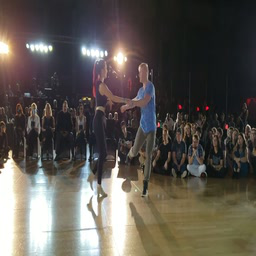

In [6]:
# Load labels
labels = pd.read_csv("../data/labels.csv")

image_paths = []
pattern_labels = []
division_labels = []

for idx, row in labels.iterrows():
    folder = f"../data/frames/{row['division']}/{row['division']}_{row['id']}"
    for img_path in Path(folder).glob("*.jpg"):
        image_paths.append(str(img_path))
        pattern_labels.append(row['pattern'])
        division_labels.append(row['division'])

# Load image
img = Image.open(image_paths[0]).convert("RGB")
display(img)

**Build Model**

In [7]:
def build_resnet_model(num_classes: int):
    model = models.resnet18(pretrained=True)
    in_features = model.fc.in_features
    model.fc = nn.Linear(in_features, num_classes)
    return model

**Data Augmentation**

In [8]:
def build_transforms():
    return transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])